## Depression prediction on combined dataset of Reddit posts and Twitter tweets


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("final_combined_dataset.csv")
df.head()

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1.0
1,"It's Sunday, I need a break, so I'm planning t...",1.0
2,Awake but tired. I need to sleep but my brain ...,1.0
3,RT @SewHQ: #Retro bears make perfect gifts and...,1.0
4,It’s hard to say whether packing lists are mak...,1.0


In [3]:
df.describe()

,label
count,27731.000000
mean,0.498756
std,0.500007
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [4]:
df.shape

(27735, 2)

In [5]:
df.isnull()

,post_text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
27730,False,False
27731,False,False
27732,False,False
27733,True,True


In [6]:
df = df.dropna()

In [7]:
df.isnull()

,post_text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
27728,False,False
27729,False,False
27730,False,False
27731,False,False


In [8]:
df.shape

(27731, 2)

In [9]:
df.dtypes

post_text     object
label        float64
dtype: object

In [10]:
 df = df[(df.label == 0) | (df.label == 1)]

In [11]:
df.shape

(27731, 2)

<AxesSubplot:xlabel='label', ylabel='count'>

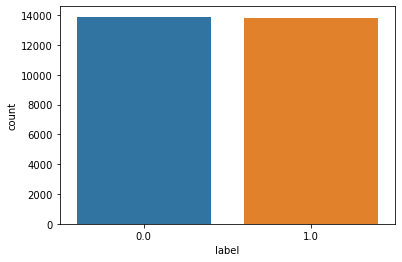

In [12]:
sns.countplot(data=df,x="label")

In [13]:
import re #regex
import nltk #naturalLanguageToolkit

In [14]:
from nltk.corpus import stopwords

In [15]:
lemmatize=nltk.WordNetLemmatizer()

In [16]:
texts=[]
for i in df.post_text:
    text=re.sub("[^a-zA-Z]"," ",i) #\\for non alphabetic signs
    text=nltk.word_tokenize(text,language="english")
    text=[lemmatize.lemmatize(word) for word in i]
    text="".join(text) #\\make tokens into sentences
    texts.append(text) #appending to list

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(stop_words="english",max_features=550) ##\removes unnecesarry words and finds most using 550 words
matrix=count.fit_transform(texts).toarray()

In [18]:
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
x=matrix
y=df["label"].values

In [20]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn import metrics
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb=GaussianNB()

In [25]:
nb.fit(x_train,y_train)

GaussianNB()

In [32]:
y_pred = nb.predict(x_test)

In [34]:
print(metrics.accuracy_score(y_test, y_pred))

0.7174388111888111


In [36]:
metrics.f1_score(y_test, y_pred)

0.6465281574630946

In [40]:
# print(classification_report(x_test,y_test))

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.65589383 0.86093921]
recall: [0.91664848 0.51761873]
fscore: [0.76465235 0.64652816]
support: [4583 4569]


In [41]:
# # print(classification_report(x_test,y_test))

# precision, recall, fscore, support = score(x_test, y_test)
# print('precision: {}'.format(precision))
# print('recall: {}'.format(recall))
# print('fscore: {}'.format(fscore))
# print('support: {}'.format(support))

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)


In [44]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [45]:
y_pred = clf.predict(x_test)

In [46]:
# from sklearn import metrics

In [47]:
print(metrics.accuracy_score(y_test, y_pred))


0.7772071678321678


In [48]:
# print(classification_report(x_test,y_test))

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.75552431 0.8030666 ]
recall: [0.8206415  0.73363975]
fscore: [0.78673779 0.76678486]
support: [4583 4569]


In [49]:
#Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [50]:
sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)

In [51]:
#Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')

In [52]:
#Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [53]:
y_predict = svc.predict(X_test_std)

In [54]:
print(metrics.accuracy_score(y_test, y_predict)*100)

77.6770104895105


In [55]:
# print(classification_report(x_test,y_test))

precision, recall, fscore, support = score(y_test, y_predict)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.71687158 0.88319175]
recall: [0.91599389 0.63711972]
fscore: [0.8042916  0.74024158]
support: [4583 4569]


In [61]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.72      0.92      0.80      4583
         1.0       0.88      0.64      0.74      4569

    accuracy                           0.78      9152
   macro avg       0.80      0.78      0.77      9152
weighted avg       0.80      0.78      0.77      9152



In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_std, y_train)

C:\Users\vivis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [57]:
y_pred = classifier.predict(X_test_std)

In [58]:
y_pred

array([1., 0., 0., ..., 0., 1., 1.])

In [59]:
print ("LogisticRegression ", metrics.accuracy_score(y_test, y_pred)*100)

LogisticRegression  78.0812937062937


In [60]:
# print(classification_report(x_test,y_test))

precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.73585942 0.84738411]
recall: [0.8771547  0.68417597]
fscore: [0.80031853 0.75708404]
support: [4583 4569]


In [49]:
df.post_text

0        It's just over 2 years since I was diagnosed w...
1        It's Sunday, I need a break, so I'm planning t...
2        Awake but tired. I need to sleep but my brain ...
3        RT @SewHQ: #Retro bears make perfect gifts and...
4        It’s hard to say whether packing lists are mak...
                               ...                        
27728                                         is that snow
27729                   moulin rouge mad me cry once again
27730    trying to shout but can t find people on the list
27731    ughh can t find my red sox hat got ta wear thi...
27732    slept wonderfully finally tried swatching for ...
Name: post_text, Length: 27731, dtype: object

In [50]:
df["label"].values

array([1., 1., 1., ..., 0., 0., 0.])

In [75]:
#clf
import pickle
filename = 'rfc_model.pkl'
pickle.dump(clf, open(filename, 'wb'))
  
# Load the pickled model
new_saved_knn = pickle.load(open(filename, 'rb'))

In [74]:
txt=[matrix[10000]]
print(texts[10000])
#It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...
xx=new_saved_knn.predict(txt)

xx

MY ENEMY'S INVISIBLE , I DON'T KNOW HOW TO FIGHT


array([0.])

In [66]:
filename = 'count.pkl'
pickle.dump(count, open(filename, 'wb'))
  
# Load the pickled model


In [73]:
df[df['label']==0]

,post_text,label
10000,"MY ENEMY'S INVISIBLE , I DON'T KNOW HOW TO FIGHT",0.0
10001,im gonna burn my house down into an ugly brack,0.0
10002,@HOT_cocoa_____ counterattack,0.0
10003,@noob_aspe810 golden.ta-chi,0.0
10004,lol or spl or drow,0.0
...,...,...
27728,is that snow,0.0
27729,moulin rouge mad me cry once again,0.0
27730,trying to shout but can t find people on the list,0.0
27731,ughh can t find my red sox hat got ta wear thi...,0.0
